# Facebook Data Crawling
After the data is collected, we need to process the data to make it more readable and easier to analyze. We can do some simple visualization to see the data distribution and the relationship between the data. We can also do some simple data cleaning to remove the data that is not needed. In this notebook, we will do some simple data processing on the data we collected from Facebook.

In [1]:
%pip install matplotlib pandas numpy seaborn wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
raw_df = pd.read_csv('Data\maythecoffeebewithyou.csv')



In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   post_id                        100 non-null    int64  
 1   text                           100 non-null    object 
 2   post_text                      100 non-null    object 
 3   shared_text                    0 non-null      float64
 4   original_text                  67 non-null     object 
 5   time                           100 non-null    object 
 6   timestamp                      100 non-null    int64  
 7   image                          97 non-null     object 
 8   image_lowquality               100 non-null    object 
 9   images                         100 non-null    object 
 10  images_description             100 non-null    object 
 11  images_lowquality              100 non-null    object 
 12  images_lowquality_description  100 non-null    obje

In [ ]:
raw_df

,post_id,text,post_text,shared_text,original_text,time,timestamp,image,image_lowquality,images,...,w3_fb_url,reactions,reaction_count,with,page_id,sharers,image_id,image_ids,was_live,fetched_time
0,881937446740787,"Java, West of Krakatoa","Java, West of Krakatoa",NaN,NaN,2023-12-01 10:19:04,1701400744,https://m.facebook.com/photo/view_full_size/?f...,https://scontent.fhan5-6.fna.fbcdn.net/v/t39.3...,['https://m.facebook.com/photo/view_full_size/...,...,https://www.facebook.com/maythecoffeebewithyou...,"{'thích': 40, 'yêu thích': 6, 'haha': 3}",49,NaN,108356753958620,NaN,881937433407455,['881937433407455'],False,2023-12-01 11:09:37.830785
1,881916090076256,How do you prefer your coffee?\n\nBạn thích cà...,How do you prefer your coffee?\n\nBạn thích cà...,NaN,How do you prefer your coffee?,2023-12-01 09:18:11,1701397091,https://m.facebook.com/photo/view_full_size/?f...,https://scontent.fhan5-8.fna.fbcdn.net/v/t39.3...,['https://m.facebook.com/photo/view_full_size/...,...,https://www.facebook.com/maythecoffeebewithyou...,"{'thích': 121, 'yêu thích': 21, 'haha': 45, 't...",188,NaN,108356753958620,NaN,881916076742924,['881916076742924'],False,2023-12-01 11:09:41.261109
2,881893906745141,Stay warm!\n\nGiữ ấm nhé!,Stay warm!\n\nGiữ ấm nhé!,NaN,Stay warm!,2023-12-01 08:12:03,1701393123,https://scontent.fhan5-11.fna.fbcdn.net/v/t39....,https://scontent.fhan5-11.fna.fbcdn.net/v/t39....,['https://scontent.fhan5-11.fna.fbcdn.net/v/t3...,...,https://www.facebook.com/maythecoffeebewithyou...,"{'thích': 161, 'yêu thích': 31, 'thương thương...",193,NaN,108356753958620,NaN,881893893411809,['881893893411809'],False,2023-12-01 11:09:53.257737
3,881881576746374,Valid.\n\nHợp lệ.,Valid.\n\nHợp lệ.,NaN,Valid.,2023-12-01 07:34:50,1701390890,https://scontent.fhan5-1.fna.fbcdn.net/v/t39.3...,https://scontent.fhan5-1.fna.fbcdn.net/v/t39.3...,['https://scontent.fhan5-1.fna.fbcdn.net/v/t39...,...,https://www.facebook.com/maythecoffeebewithyou...,"{'thích': 690, 'yêu thích': 161, 'haha': 139, ...",999,NaN,108356753958620,NaN,881881526746379,['881881526746379'],False,2023-12-01 11:10:05.067799
4,881863260081539,Isn't that nice? Hmmm?,Isn't that nice? Hmmm?,NaN,NaN,2023-12-01 06:35:31,1701387331,https://scontent.fhan5-11.fna.fbcdn.net/v/t39....,https://scontent.fhan5-11.fna.fbcdn.net/v/t39....,['https://scontent.fhan5-11.fna.fbcdn.net/v/t3...,...,https://www.facebook.com/maythecoffeebewithyou...,"{'thích': 282, 'yêu thích': 40, 'haha': 82, 't...",407,NaN,108356753958620,NaN,881862436748288,['881862436748288'],False,2023-12-01 11:10:40.203217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,877186513882547,hehe,hehe,NaN,NaN,2023-11-21 22:36:02,1700580962,https://m.facebook.com/photo/view_full_size/?f...,https://scontent.fhan5-2.fna.fbcdn.net/v/t39.3...,['https://m.facebook.com/photo/view_full_size/...,...,https://www.facebook.com/maythecoffeebewithyou...,"{'thích': 1759, 'yêu thích': 396, 'haha': 279,...",2454,NaN,108356753958620,NaN,877186490549216,['877186490549216'],False,2023-12-01 11:32:49.844572
96,877131183888080,Silence please.\n\nLàm ơn im lặng.,Silence please.\n\nLàm ơn im lặng.,NaN,Silence please.,2023-11-21 20:36:05,1700573765,https://scontent.fhan5-8.fna.fbcdn.net/v/t39.3...,https://scontent.fhan5-8.fna.fbcdn.net/v/t39.3...,['https://scontent.fhan5-8.fna.fbcdn.net/v/t39...,...,https://www.facebook.com/maythecoffeebewithyou...,"{'thích': 745, 'yêu thích': 88, 'haha': 251, '...",1088,NaN,108356753958620,NaN,877131157221416,['877131157221416'],False,2023-12-01 11:33:07.391419
97,877123583888840,Legit.\n\nHợp pháp.,Legit.\n\nHợp pháp.,NaN,Legit.,2023-11-21 20:19:05,1700572745,https://m.facebook.com/photo/view_full_size/?f...,https://scontent.fhan5-11.fna.fbcdn.net/v/t39....,['https://m.facebook.com/photo/view_full_size/...,...,https://www.facebook.com/maythecoffeebewithyou...,"{'thích': 24485, 'yêu thích': 2743, 'haha': 54...",32959,NaN,108356753958620,NaN,877123563888842,['877123563888842'],False,2023-12-01

In [ ]:
raw_df[['post_text', 'reactions']]

,post_text,reactions
0,"Java, West of Krakatoa","{'thích': 40, 'yêu thích': 6, 'haha': 3}"
1,How do you prefer your coffee?\n\nBạn thích cà...,"{'thích': 121, 'yêu thích': 21, 'haha': 45, 't..."
2,Stay warm!\n\nGiữ ấm nhé!,"{'thích': 161, 'yêu thích': 31, 'thương thương..."
3,Valid.\n\nHợp lệ.,"{'thích': 690, 'yêu thích': 161, 'haha': 139, ..."
4,Isn't that nice? Hmmm?,"{'thích': 282, 'yêu thích': 40, 'haha': 82, 't..."
...,...,...
95,hehe,"{'thích': 1759, 'yêu thích': 396, 'haha': 279,..."
96,Silence please.\n\nLàm ơn im lặng.,"{'thích': 745, 'yêu thích': 88, 'haha': 251, '..."
97,Legit.\n\nHợp pháp.,"{'thích': 24485, 'yêu thích': 2743, 'haha': 54..."
98,Mood,"{'thích': 1627, 'yêu thích': 210, 'haha': 627,..."


In [ ]:
post_df_full1=raw_df
post_df_full1['reactions'] = post_df_full1['reactions'].apply(lambda x : dict(eval(x)) )
post_df_full_reactions = post_df_full1['reactions'].apply(pd.Series )
# Merge cột vào dataframe
post_df_full_with_reactions = pd.concat([post_df_full1, post_df_full_reactions], axis=1).drop('reactions', axis=1)
post_df_full_with_reactions[['post_text','thích','yêu thích','haha','wow','buồn','phẫn nộ','thương thương',
                                 'shares','comments','reaction_count']]

C:\Users\hao17\AppData\Local\Temp\ipykernel_10536\1419893808.py:3: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  post_df_full_reactions = post_df_full1['reactions'].apply(pd.Series )


,post_text,thích,yêu thích,haha,wow,buồn,phẫn nộ,thương thương,shares,comments,reaction_count
0,"Java, West of Krakatoa",40.0,6.0,3.0,NaN,NaN,NaN,NaN,14,0,49
1,How do you prefer your coffee?\n\nBạn thích cà...,121.0,21.0,45.0,NaN,NaN,NaN,1.0,39,205,188
2,Stay warm!\n\nGiữ ấm nhé!,161.0,31.0,NaN,NaN,NaN,NaN,1.0,36,25,193
3,Valid.\n\nHợp lệ.,690.0,161.0,139.0,NaN,NaN,NaN,9.0,618,72,999
4,Isn't that nice? Hmmm?,282.0,40.0,82.0,NaN,NaN,NaN,3.0,229,30,407
...,...,...,...,...,...,...,...,...,...,...,...
95,hehe,1759.0,396.0,279.0,4.0,NaN,NaN,16.0,997,87,2454
96,Silence please.\n\nLàm ơn im lặng.,745.0,88.0,251.0,NaN,NaN,NaN,4.0,356,81,1088
97,Legit.\n\nHợp pháp.,24485.0,2743.0,5485.0,57.0,8.0,3.0,178.0,27953,1772,32959
98,Mood,1627.0,210.0,627.0,2.0,NaN,NaN,16.0,1509,55,2482


In [ ]:
#lam sach du lieu
for i in range(0, len(post_df_full_with_reactions['thích'].values), 1):
    if pd.isna(post_df_full_with_reactions['thích'].values[i]):
        post_df_full_with_reactions['thích'].values[i] = 0
        
    if pd.isna(post_df_full_with_reactions['yêu thích'].values[i]):
        post_df_full_with_reactions['yêu thích'].values[i] = 0
        
    if pd.isna(post_df_full_with_reactions['haha'].values[i]):
        post_df_full_with_reactions['haha'].values[i] = 0
        
    if pd.isna(post_df_full_with_reactions['wow'].values[i]):
        post_df_full_with_reactions['wow'].values[i] = 0
        
    if pd.isna(post_df_full_with_reactions['buồn'].values[i]):
        post_df_full_with_reactions['buồn'].values[i] = 0
        
    if pd.isna(post_df_full_with_reactions['phẫn nộ'].values[i]):
        post_df_full_with_reactions['phẫn nộ'].values[i] = 0
        
    if pd.isna(post_df_full_with_reactions['thương thương'].values[i]):
        post_df_full_with_reactions['thương thương'].values[i] = 0
        
    if pd.isna(post_df_full_with_reactions['shares'].values[i]):
        post_df_full_with_reactions['shares'].values[i] = 0
    
    if pd.isna(post_df_full_with_reactions['comments'].values[i]):
        post_df_full_with_reactions['comments'].values[i] = 0
post_df_full_with_reactions[['post_text','time','thích','yêu thích','haha','wow','buồn','phẫn nộ','thương thương',
                                 'shares','comments','reaction_count']]

,post_text,time,thích,yêu thích,haha,wow,buồn,phẫn nộ,thương thương,shares,comments,reaction_count
0,"Java, West of Krakatoa",2023-12-01 10:19:04,40.0,6.0,3.0,0.0,0.0,0.0,0.0,14,0,49
1,How do you prefer your coffee?\n\nBạn thích cà...,2023-12-01 09:18:11,121.0,21.0,45.0,0.0,0.0,0.0,1.0,39,205,188
2,Stay warm!\n\nGiữ ấm nhé!,2023-12-01 08:12:03,161.0,31.0,0.0,0.0,0.0,0.0,1.0,36,25,193
3,Valid.\n\nHợp lệ.,2023-12-01 07:34:50,690.0,161.0,139.0,0.0,0.0,0.0,9.0,618,72,999
4,Isn't that nice? Hmmm?,2023-12-01 06:35:31,282.0,40.0,82.0,0.0,0.0,0.0,3.0,229,30,407
...,...,...,...,...,...,...,...,...,...,...,...,...
95,hehe,2023-11-21 22:36:02,1759.0,396.0,279.0,4.0,0.0,0.0,16.0,997,87,2454
96,Silence please.\n\nLàm ơn im lặng.,2023-11-21 20:36:05,745.0,88.0,251.0,0.0,0.0,0.0,4.0,356,81,1088
97,Legit.\n\nHợp pháp.,2023-11-21 20:19:05,24485.0,2743.0,5485.0,57.0,8.0,3.0,178.0,27953,1772,32959
98,Mood,2023-11-21 19:06:01,1627.0,210.0,627.0,2.0,0.0,0.0,16.0,1509,55,2482


In [ ]:
time_df = post_df_full_with_reactions['time']
time_df 

0     2023-12-01 10:19:04
1     2023-12-01 09:18:11
2     2023-12-01 08:12:03
3     2023-12-01 07:34:50
4     2023-12-01 06:35:31
             ...         
95    2023-11-21 22:36:02
96    2023-11-21 20:36:05
97    2023-11-21 20:19:05
98    2023-11-21 19:06:01
99    2023-11-21 17:20:03
Name: time, Length: 100, dtype: object

In [ ]:
a = time_df.iloc[0][:10]
a

'2023-12-01'

In [ ]:
post_in_day = {}
for i in time_df:
    tmp1 = i[:10]
    tmp2 = i[:7]
    if tmp1 in post_in_day:
        post_in_day[tmp1] += 1
    else:
        post_in_day[tmp1] = 1
    
post_in_day = {key: post_in_day[key] for key in reversed(post_in_day)}
post_in_day

{'2023-11-21': 5,
 '2023-11-22': 4,
 '2023-11-24': 1,
 '2023-11-25': 6,
 '2023-11-26': 3,
 '2023-11-27': 16,
 '2023-11-28': 18,
 '2023-11-29': 16,
 '2023-11-30': 17,
 '2023-12-01': 14}

In [ ]:
from datetime import datetime


date_str2 = time_df.iloc[0][:10]
date_str1 = time_df.iloc[len(time_df) - 1][:10]

date_format = "%Y-%m-%d"
date1 = datetime.strptime(date_str1, date_format)
date2 = datetime.strptime(date_str2, date_format)

time_difference = date2 - date1 
days_difference = time_difference.days + 1



print(f"số ngày giữa ngày {date_str1} and {date_str2}: {days_difference} ngày")


số ngày giữa ngày 2023-11-21 and 2023-12-01: 11 ngày


In [ ]:
#trung binh post 1 ngay 
avg_post_day = len(time_df) / days_difference
print("Số post trung bình được đăng trong một ngày là:", avg_post_day)


Số post trung bình được đăng trong một ngày là: 10.0


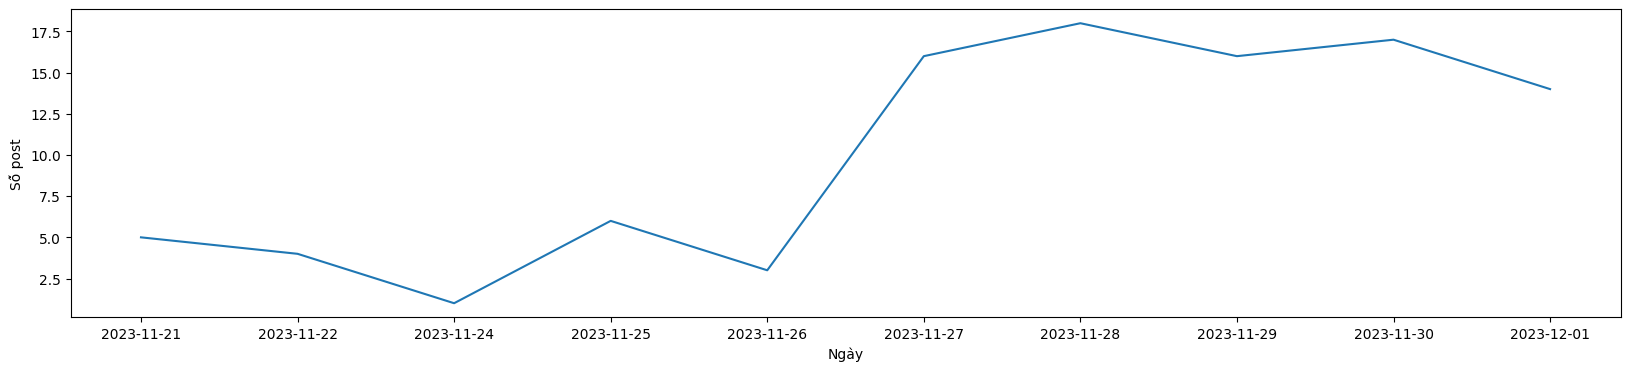

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo DataFrame từ dữ liệu
data = {'Ngày': post_in_day.keys(), 'Số post': post_in_day.values()}
df = pd.DataFrame(data)
plt.figure(figsize=(20, 4))
# Vẽ biểu đồ đường
sns.lineplot(x='Ngày', y='Số post', data=df)

# Hiển thị biểu đồ
plt.show()


## Reactions analysis

## Lượt reaction của từng bài viết


In [ ]:
dates=post_df_full_with_reactions.index.to_list()
rc=post_df_full_with_reactions['reaction_count'].to_list()
dates.reverse()
rc.reverse()
print(len(dates),len(rc))
print(dates)
print(rc)

100 100
[99, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
[6473, 2482, 32959, 1088, 2454, 64042, 1518, 683, 1073, 8456, 671, 9723, 586, 11848, 8161, 11856, 484, 3748, 2775, 672, 43126, 774, 490, 2100, 589, 19789, 707, 79251, 2035, 941, 281, 1649, 1770, 20994, 4688, 500, 815, 799, 592, 501, 873, 420, 1582, 469, 398, 2591, 1403, 1130, 22946, 1199, 1623, 461, 2968, 333, 960, 339, 2893, 261, 385, 163, 382, 718, 214, 14050, 7289, 467, 10412, 1257, 1056, 2197, 427, 1697, 255, 457, 228, 230, 567, 1022, 490, 934, 330, 1992, 4837, 846, 350, 516, 122, 171, 366, 441, 1121, 122, 318, 313, 571, 407, 999, 193, 188, 49]


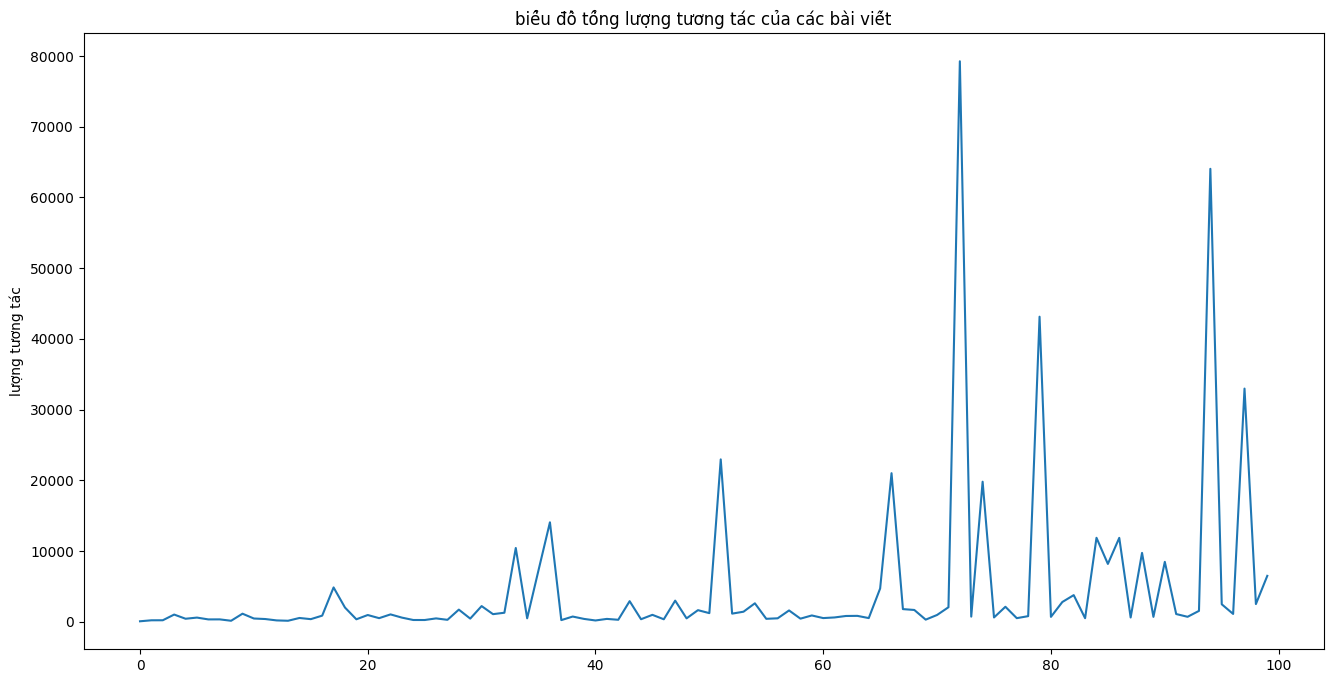

In [ ]:
plt.figure(figsize=(16,8))
plt.title("biểu đồ tổng lượng tương tác của các bài viết")
plt.ylabel("lượng tương tác")
plt.plot(dates,rc)
plt.show()

In [ ]:
print("Trung bình một bài viết có", sum(rc)/100 ,'lượt tương tác')


Trung bình một bài viết có 4561.41 lượt tương tác


In [ ]:
x = max(rc)
y = rc.index(x)
print(f'lượng tương tác cao nhất là bài viết thứ {y + 1} với {x} lượt tương tác')

lượng tương tác cao nhất là bài viết thứ 28 với 79251 lượt tương tác


In [ ]:
x = min(rc)
y = rc.index(x)
print(f'lượng tương tác thấp nhất là bài viết thứ {y + 1} với {x} lượt tương tác')

lượng tương tác thấp nhất là bài viết thứ 100 với 49 lượt tương tác


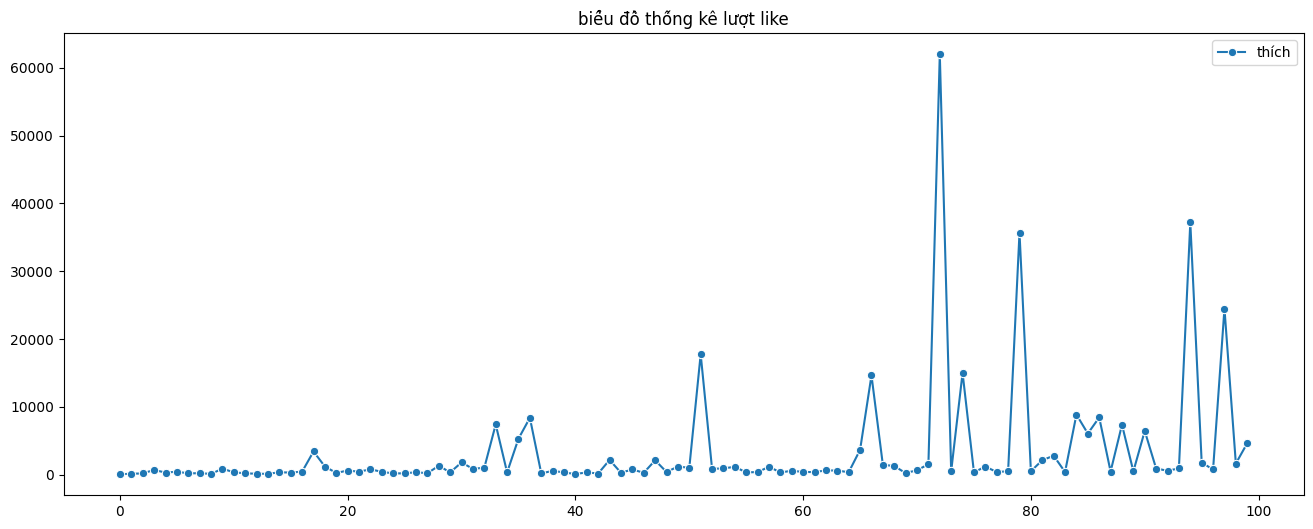

In [ ]:
like_post = post_df_full_with_reactions[['time', 'thích']]
like_post = pd.DataFrame(like_post)
plt.figure(figsize=(16,6))
sns.lineplot(like_post, marker="o")
plt.title('biểu đồ thống kê lượt like')
plt.show()


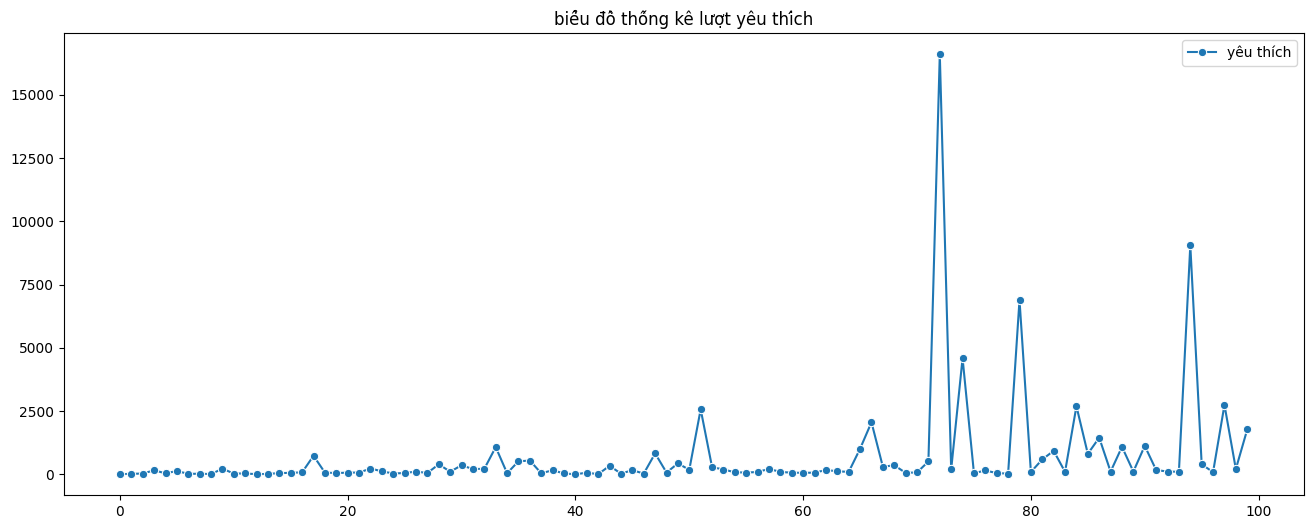

In [ ]:
like_post = post_df_full_with_reactions[['time', 'yêu thích']]
like_post = pd.DataFrame(like_post)
plt.figure(figsize=(16,6))
sns.lineplot(like_post, marker="o")
plt.title('biểu đồ thống kê lượt yêu thích')
plt.show()

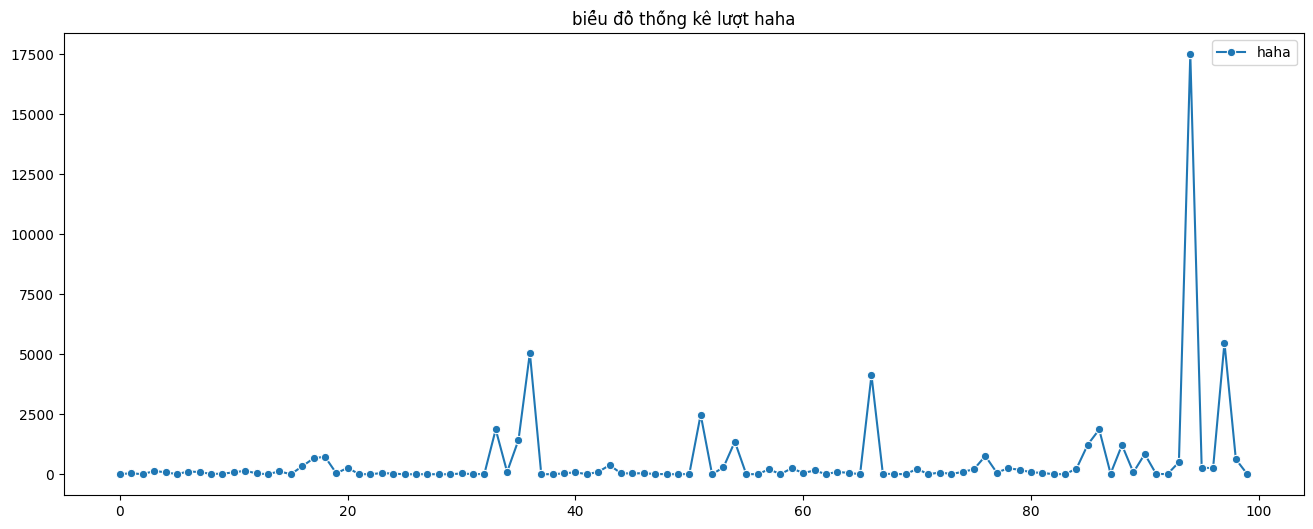

In [ ]:
like_post = post_df_full_with_reactions[['time', 'haha']]
like_post = pd.DataFrame(like_post)
plt.figure(figsize=(16,6))
sns.lineplot(like_post,markers="o")
plt.title('biểu đồ thống kê lượt haha')
plt.show()


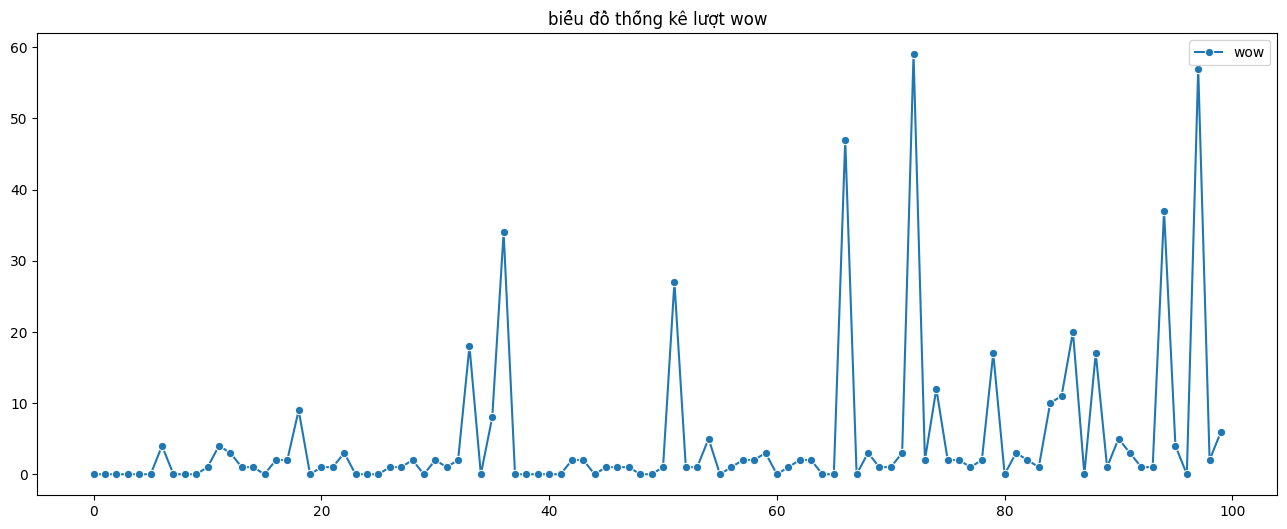

In [ ]:
like_post = post_df_full_with_reactions[['time', 'wow']]
like_post = pd.DataFrame(like_post)
plt.figure(figsize=(16,6))
sns.lineplot(like_post, marker="o")
plt.title('biểu đồ thống kê lượt wow')
plt.show()


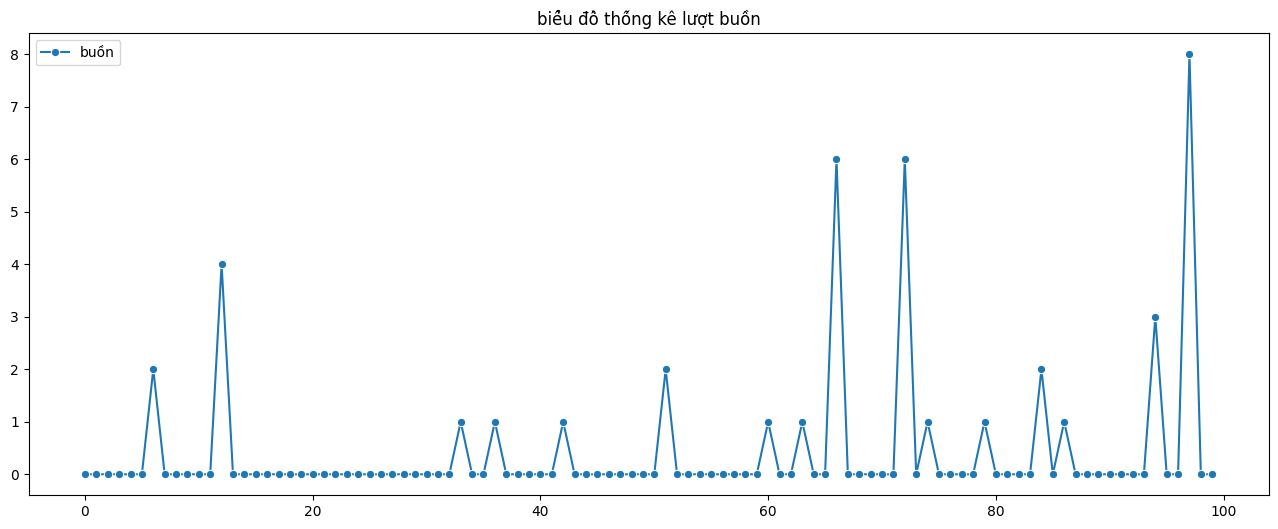

In [ ]:
like_post = post_df_full_with_reactions[['time', 'buồn']]
like_post = pd.DataFrame(like_post)
plt.figure(figsize=(16,6))
sns.lineplot(like_post, marker="o")
plt.title('biểu đồ thống kê lượt buồn')
plt.show()

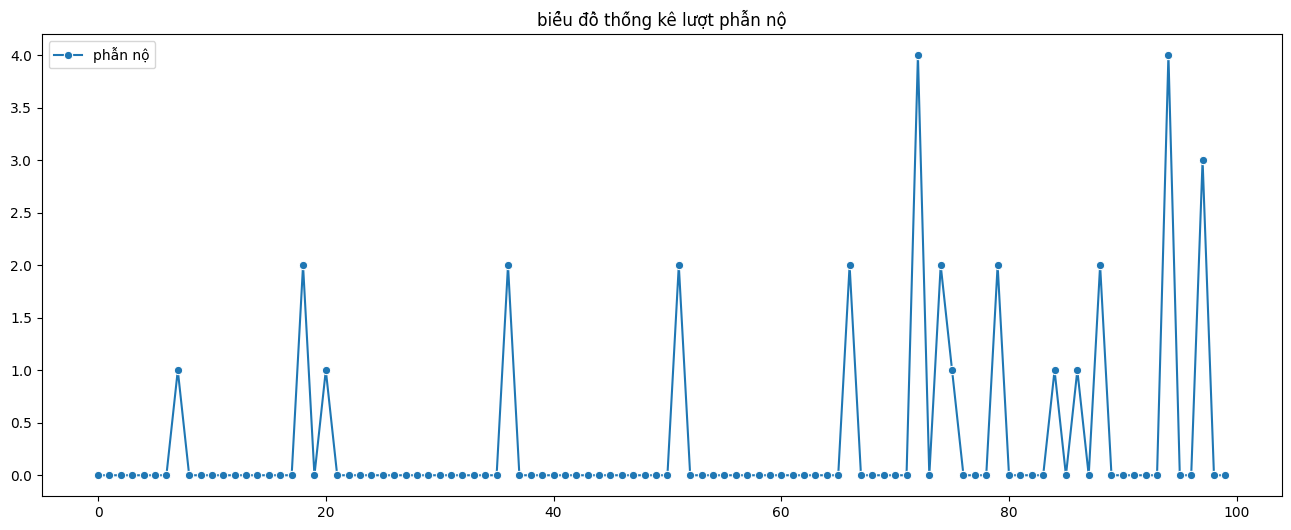

In [ ]:
like_post = post_df_full_with_reactions[['time', 'phẫn nộ']]
like_post = pd.DataFrame(like_post)
plt.figure(figsize=(16,6))
sns.lineplot(like_post, marker="o")
plt.title('biểu đồ thống kê lượt phẫn nộ')
plt.show()


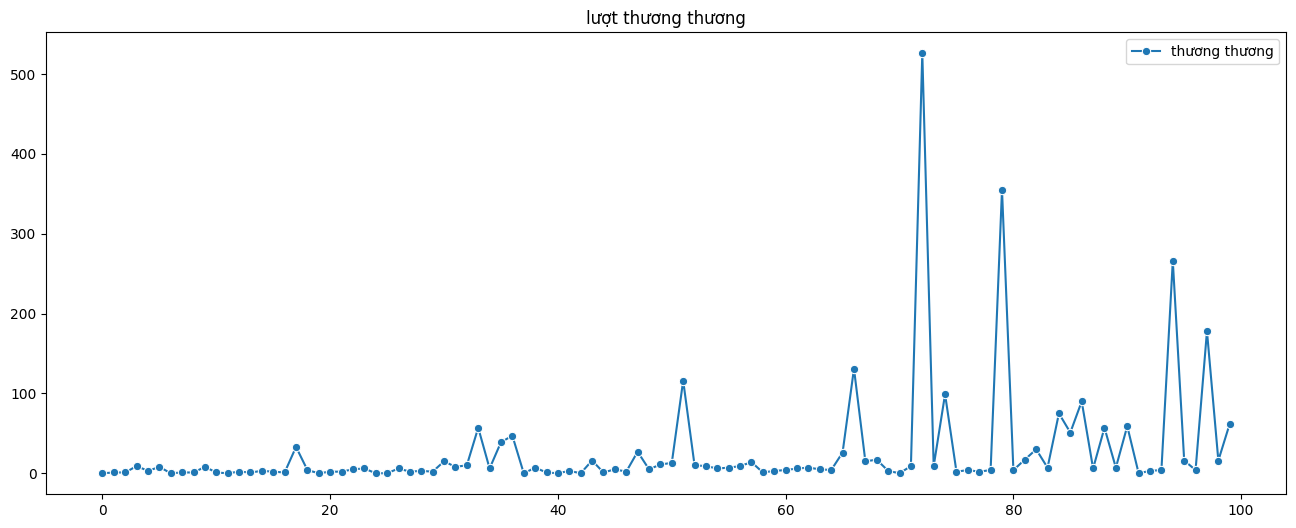

In [ ]:
like_post = post_df_full_with_reactions[['time', 'thương thương']]
like_post = pd.DataFrame(like_post)
plt.figure(figsize=(16,6))
sns.lineplot(like_post, marker="o")
plt.title('lượt thương thương')
plt.show()


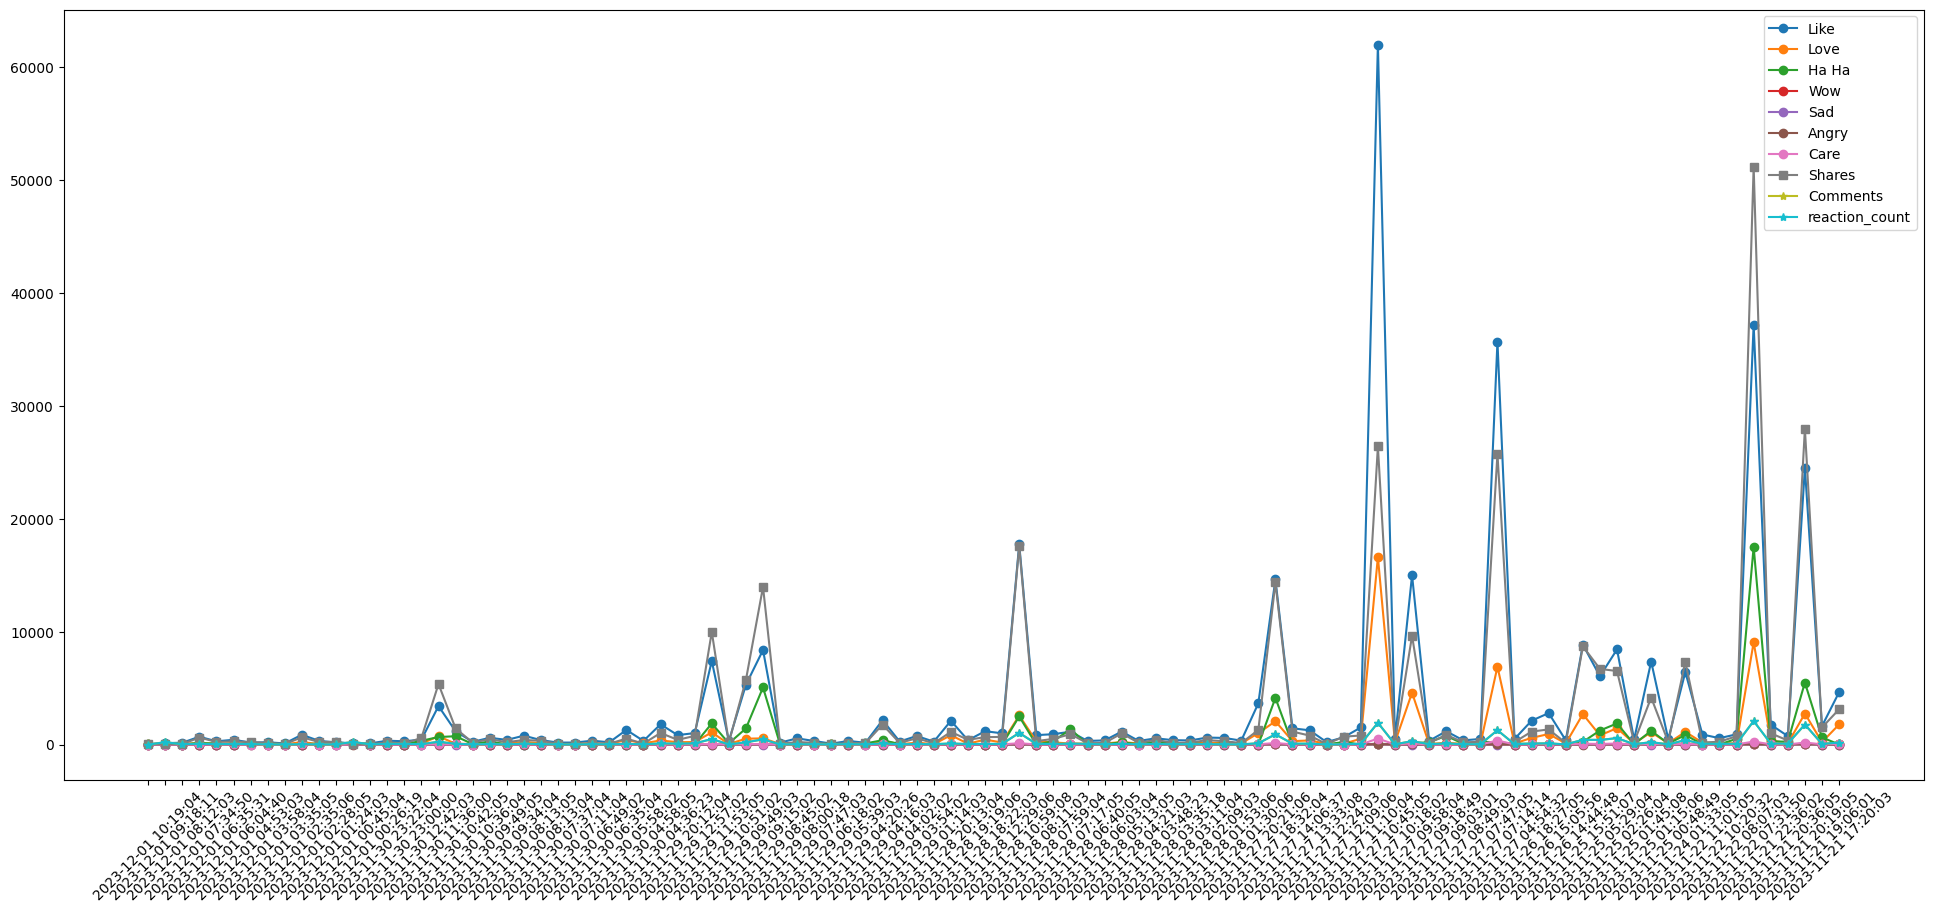

In [ ]:

fig, ax = plt.subplots(figsize=(24, 10))
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['thích'], label = "Like", marker="o")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['yêu thích'], label = "Love", marker="o")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['haha'], label = "Ha Ha", marker="o")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['wow'], label = "Wow", marker="o")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['buồn'], label = "Sad", marker="o")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['phẫn nộ'], label = "Angry", marker="o")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['thương thương'], label = "Care", marker="o")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['shares'], label = "Shares", marker="s")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['comments'], label = "Comments", marker="*")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['comments'], label = "reaction_count", marker="*")
plt.xticks(rotation=45)
plt.legend()
plt.show()